# Project FIN404

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import seaborn as sns

sns.set_theme()

## Question 6

In [34]:

# Constants
ETA = 30 / 252  # given in part 2

# Functions for c(τ; s), d(τ; s), and ℓ(s, τ, Vt)
def d_function(tau, s, lam, xi):
    numerator = lam * s * np.exp(lam * tau)
    denominator = lam + 0.5 * xi**2 * s * (np.exp(lam * tau) - 1)
    return numerator / denominator

def c_integrand(u, s, lambd, xi):
    return d_function(u, s, lambd, xi)

def c_function(tau, s, lambd, theta, xi):
    integral_result, _ = quad(c_integrand, 0, tau, args=(s, lambd, xi))
    return -lambd * theta * integral_result

def cd_fun(s, tau, Vt, lam, theta, xi):
    c_val = c_function(tau, s, lam, theta, xi)
    d_val = d_function(tau, s, lam, xi)
    return c_val + d_val * Vt

# Compute a' and b' constants
def a_b_primes(lam, theta):
    a_prime = theta * (ETA - (1 - np.exp(-lam * ETA)) / lam)
    b_prime = (1 - np.exp(-lam * ETA)) / lam
    return a_prime, b_prime

# VIX futures pricing function
def vix_futures_price(tau, Vt, lam, theta, xi):
    a_prime, b_prime = a_b_primes(lam, theta)

    def integrand(s):
        if s == 0:
            return 0
        exponent = -s * a_prime - cd_fun(s * b_prime, tau, Vt, lam, theta, xi)
        return (1 - np.exp(exponent)) / s**1.5

    integral, _ = quad(integrand, 1e-5, 100, limit=500)
    return 50 / np.sqrt(np.pi * ETA) * integral

--- Impact of Vt ---


/var/folders/mc/qf75k40s6ns_nr8c35wdmp400000gn/T/ipykernel_11426/3281546073.py:38: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  integral, _ = quad(integrand, 1e-5, 100, limit=500)


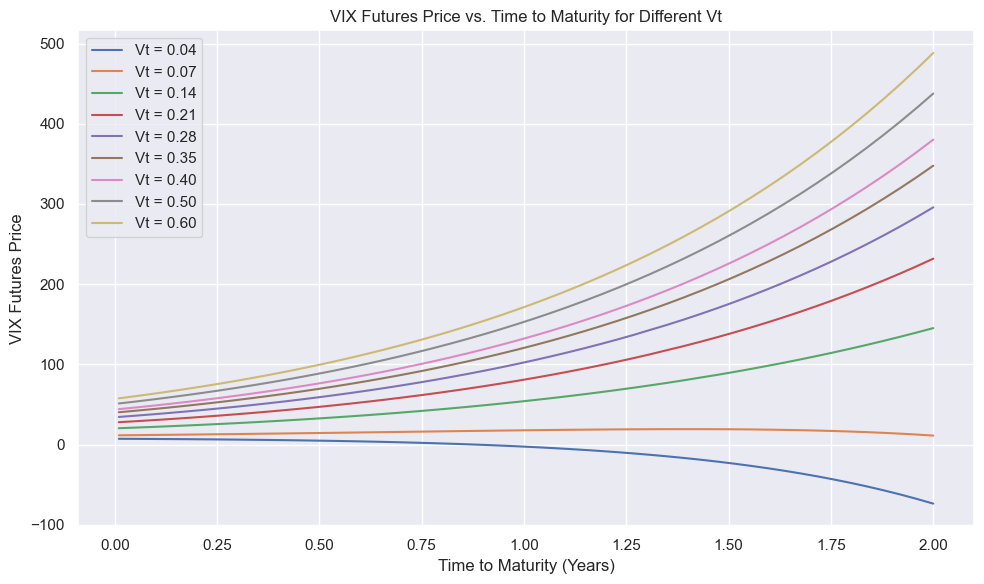

In [35]:
taus = np.linspace(0.01, 2.0, 50) # From 0.01 years to 2 years

print("--- Impact of Vt ---")
lambd_base = 2
theta_base = 0.04
xi_base = 0.5
Vts_to_test = [0.04, 0.07, 0.14, 0.21, 0.28, 0.35, 0.4, 0.5, 0.6]
plt.figure(figsize=(10, 6))

for test_Vt in Vts_to_test:
    prices = [vix_futures_price(tau, test_Vt, lambd_base, theta_base, xi_base) for tau in taus]
    plt.plot(taus, prices, label=f'Vt = {test_Vt:.2f}')

plt.xlabel('Time to Maturity (Years)')
plt.ylabel('VIX Futures Price')
plt.title('VIX Futures Price vs. Time to Maturity for Different Vt')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('./plots/Question 6_1.png')
plt.show()

--- Impact of Parameters ---


/var/folders/mc/qf75k40s6ns_nr8c35wdmp400000gn/T/ipykernel_11426/3281546073.py:38: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  integral, _ = quad(integrand, 1e-5, 100, limit=500)


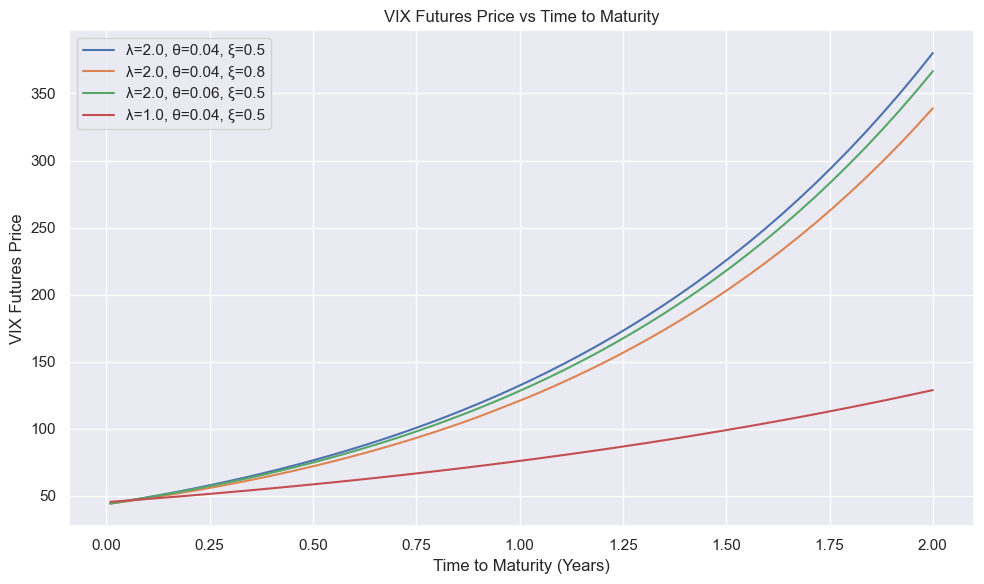

In [36]:
print("--- Impact of Parameters ---")
Vt = 0.4
parameter_sets = [
    (2.0, 0.04, 0.5),  # baseline
    (2.0, 0.04, 0.8),   # higher xi
    (2.0, 0.06, 0.5),  # higher theta
    (1.0, 0.04, 0.5)  # lower lambda
]

results = {}
for lam, theta, xi in parameter_sets:
    prices = [vix_futures_price(tau, Vt, lam, theta, xi) for tau in taus]
    results[(lam, theta, xi)] = prices

plt.figure(figsize=(10, 6))
for key, prices in results.items():
    label = f"λ={key[0]}, θ={key[1]}, ξ={key[2]}"
    plt.plot(taus, prices, label=label)
plt.xlabel("Time to Maturity (Years)")
plt.ylabel("VIX Futures Price")
plt.title("VIX Futures Price vs Time to Maturity")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('./plots/Question 6_2.png')
plt.show()

## Question 7

In [37]:
# Variance futures pricing function
def variance_futures_price(T_minus_t, t0, t, accrued_var, Vt, lam, theta, xi):
    # Compute a* and b* terms
    a_star = theta * (T_minus_t - (1 - np.exp(-lam * T_minus_t)) / lam)
    b_star = (1 - np.exp(-lam * T_minus_t)) / lam

    # Calculating period
    total_period = T_minus_t + t - t0
    if total_period <= 0:
        return np.nan

    # Expected future variance component
    expected_future_var = a_star + b_star * Vt

    # Compute full variance futures price
    futures_price = (10000 / total_period) * (accrued_var + expected_future_var)
    return futures_price


--- Impact of Vt ---


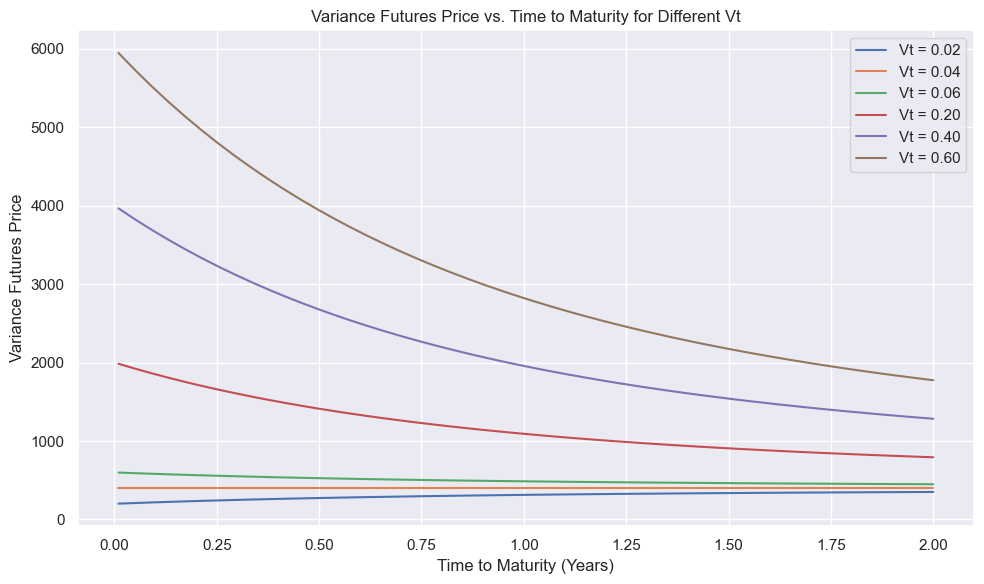

In [38]:
taus = np.linspace(0.01, 2.0, 50) # From 0.01 years to 2 years

print("--- Impact of Vt ---")
t0 = 0.0
t = 0.0
lambd_base = 2
theta_base = 0.04
xi_base = 0.5
accrued_var = 0.0 
Vts_to_test = [0.02, 0.04, 0.06, 0.2, 0.4, 0.6]
plt.figure(figsize=(10, 6))
for test_Vt in Vts_to_test:
    prices = [variance_futures_price(tau, t0, t, accrued_var, test_Vt, lambd_base, theta_base, xi_base) for tau in taus]
    plt.plot(taus, prices, label=f'Vt = {test_Vt:.2f}')
plt.xlabel('Time to Maturity (Years)')
plt.ylabel('Variance Futures Price')
plt.title('Variance Futures Price vs. Time to Maturity for Different Vt')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('./plots/Question 7_1.png')
plt.show()

--- Impact of Accrued Volatility ---


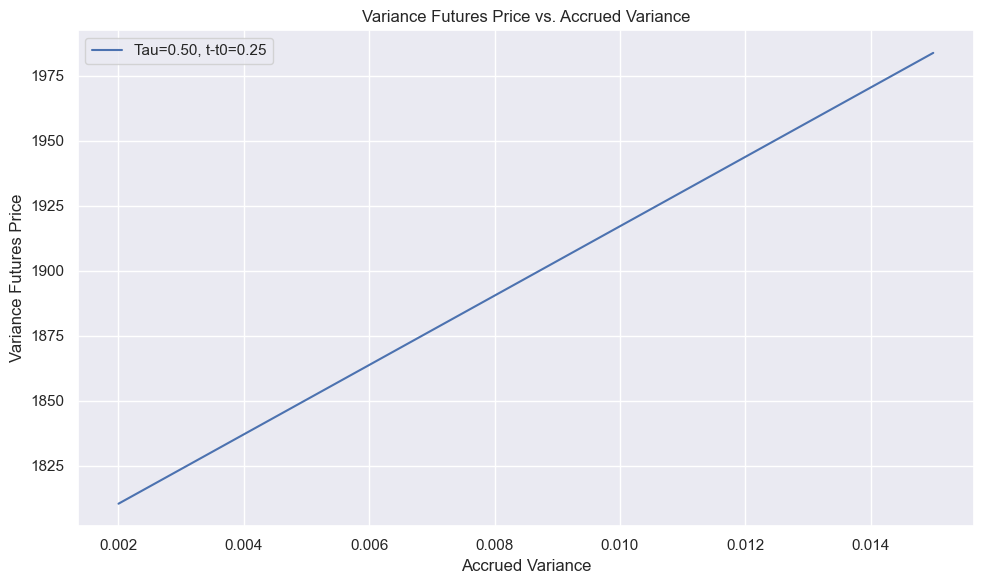

In [39]:
Vt_base = 0.4
lambd_base = 2
print("--- Impact of Accrued Volatility ---")
theta_base = 0.04
xi_base = 0.5
fixed_t0 = 0.0
fixed_current_time = 0.25 
fixed_tau = 0.5
accrued_variance_values = np.linspace(0.002, 0.015, 50)
prices_accrued = [variance_futures_price(fixed_tau, fixed_t0, fixed_current_time, 
                                                accrued_val, Vt_base, lambd_base, 
                                                theta_base, xi_base) 
                  for accrued_val in accrued_variance_values]

plt.figure(figsize=(10, 6))
plt.plot(accrued_variance_values, prices_accrued, label=f'Tau={fixed_tau:.2f}, t-t0={fixed_current_time-fixed_t0:.2f}')
plt.xlabel('Accrued Variance')
plt.ylabel('Variance Futures Price')
plt.title('Variance Futures Price vs. Accrued Variance')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('./plots/Question 7_2.png')
plt.show()


--- Impact of Parameters ---


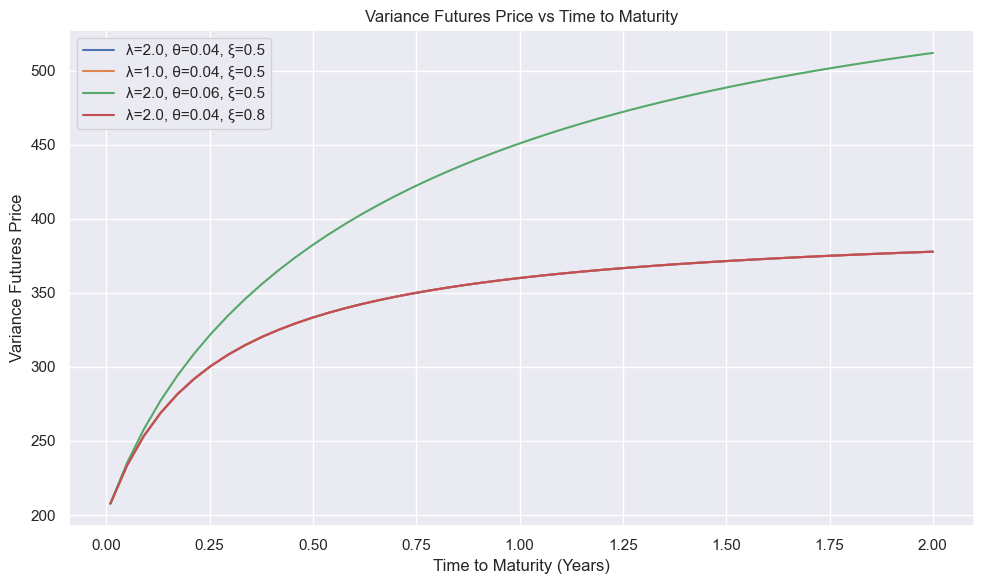

In [40]:
print("--- Impact of Parameters ---")
Vt = 0.04
t0 = 0
t = 0.25
accrued_var = 0.005
parameter_sets = [
    (2.0, 0.04, 0.5),  # baseline
    (1.0, 0.04, 0.5),  # lower lambda
    (2.0, 0.06, 0.5),  # higher theta
    (2.0, 0.04, 0.8)   # higher xi
]

results = {}
for lam, theta, xi in parameter_sets:
    prices = [variance_futures_price(tau, t0, t, accrued_var, Vt, lam, theta, xi) for tau in taus]
    results[(lam, theta, xi)] = prices

plt.figure(figsize=(10, 6))
for key, prices in results.items():
    label = f"λ={key[0]}, θ={key[1]}, ξ={key[2]}"
    plt.plot(taus, prices, label=label)
plt.xlabel("Time to Maturity (Years)")
plt.ylabel("Variance Futures Price")
plt.title("Variance Futures Price vs Time to Maturity")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('./plots/Question 7_3.png')
plt.show()

## Question 8 

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Load the Excel data
df = pd.read_excel("./data/data_excel.xlsx")

df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,Data on 09.05.2025,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,VA - S&P 500 Variance Futures,NaN,NaN,NaN,NUMBER OF DAYS,NaN,NaN
3,NaN,SYMBOL,EXPIRATION,SETTLEMENT,ACCRUED (annualize),Total,Elapsed,Remaining
4,NaN,VA/K5,2025-05-16 00:00:00,579.575681,582.219,123,119,4
5,NaN,VA/M5,2025-06-20 00:00:00,476.94509,470.917,186,159,27
6,NaN,VA/N5,2025-07-18 00:00:00,699.108234,805.347,123,77,46
7,NaN,VA/Q5,2025-08-15 00:00:00,783.27396,1092.85,120,54,66
8,NaN,VA/U5,2025-09-19 00:00:00,796.138723,1474.92,124,34,90
9,NaN,VA/V5,2025-10-17 00:00:00,517.635619,300.293,125,15,110


In [42]:
# Clean the variance futures data
df_var = df.iloc[4:12].copy()
df_var.columns = ['Empty', 'Symbol', 'Expiration', 'Settlement', 'Accrued', 'Days_Total', 'Days_Elapsed', 'Days_Remaining']
df_var['Settlement'] = pd.to_numeric(df_var['Settlement'], errors='coerce')
df_var['Accrued'] = pd.to_numeric(df_var['Accrued'], errors='coerce')
df_var['Days_Remaining'] = pd.to_numeric(df_var['Days_Remaining'], errors='coerce')
df_var = df_var[['Settlement', 'Accrued', 'Days_Elapsed', 'Days_Remaining']]

# Clean VIX futures data
df_vix = df.iloc[15:25].copy()
df_vix.columns = ['Empty1', 'Symbol', 'Expiration', 'Settlement', 'Days to maturity', 'Empty2', 'Empty3', 'Empty4']
df_vix['Settlement'] = pd.to_numeric(df_vix['Settlement'], errors='coerce')
df_vix['Days to maturity'] = pd.to_numeric(df_vix['Days to maturity'], errors='coerce')
df_vix = df_vix[['Settlement', 'Days to maturity']]

In [43]:
df_var

,Settlement,Accrued,Days_Elapsed,Days_Remaining
4,579.575681,582.219,119,4
5,476.945090,470.917,159,27
6,699.108234,805.347,77,46
7,783.273960,1092.850,54,66
8,796.138723,1474.920,34,90
9,517.635619,300.293,15,110
10,515.901565,470.908,159,154
11,619.762974,691.246,95,277


In [44]:
df_vix

,Settlement,Days to maturity
15,22.6694,0
16,22.3484,12
17,21.8897,40
18,21.7491,68
19,21.7805,103
20,21.8737,131
21,22.0178,166
22,22.1365,194
23,22.2502,222


In [45]:
# Objective function
def objective(params):
    lam, theta, xi, Vt = params
    if lam <= 0 or theta <= 0 or xi <= 0 or Vt <= 0:
        return 1e6  # Penalize invalid parameters
    
    error = 0

    # VIX futures
    for _, row in df_vix.iterrows():
        model_price = vix_futures_price(row['Days to maturity'] / 252, Vt, lam, theta, xi)
        error += (model_price - row['Settlement'])**2

    # Variance futures
    for _, row in df_var.iterrows():
        tau = row['Remaining'] / 252
        model_price = variance_futures_price(tau, 0, row['Elapsed']/252, row['Accrued'], Vt, lam, theta, xi)
        error += (model_price - row['Settlement'])**2

    return error

In [46]:
# Initial guess and bounds
initial_guess = [1.0, 0.04, 0.5, 0.04]  # [λ, θ, ξ, Vt]
bounds = [(1e-4, 10), (1e-4, 1), (1e-4, 5), (1e-4, 1)]

# Minimize
result = minimize(objective, initial_guess, bounds=bounds, method='L-BFGS-B')

# Display results
lam_opt, theta_opt, xi_opt, Vt_opt = result.x
print("Calibrated Parameters:")
print(f"λ     = {lam_opt:.4f}")
print(f"θ     = {theta_opt:.4f}")
print(f"ξ     = {xi_opt:.4f}")
print(f"Vₜ    = {Vt_opt:.4f}")



KeyError: 'Remaining'